## Python EDA for the Diminos Delivery Time

In [39]:
# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [6]:
# load dataset
df = pd.read_csv("C:/Users/msnla/Downloads/diminos_data.csv")

In [7]:
df.head()

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056


In [9]:
df.shape

(15000, 3)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            15000 non-null  int64 
 1   order_placed_at     15000 non-null  object
 2   order_delivered_at  15000 non-null  object
dtypes: int64(1), object(2)
memory usage: 351.7+ KB


In [11]:
df.isnull().sum()

order_id              0
order_placed_at       0
order_delivered_at    0
dtype: int64

In [19]:
df.describe(include='all')

,order_id,order_placed_at,order_delivered_at,delivery_time_min
count,1.500000e+04,15000,15000,15000.000000
mean,1.530610e+06,2023-03-14 10:49:21.257533184,2023-03-14 11:09:51.220893184,20.499389
min,1.523111e+06,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,15.000010
25%,1.526861e+06,2023-03-07 15:57:25,2023-03-07 16:20:38.480371200,15.274826
50%,1.530610e+06,2023-03-14 09:32:06.500000,2023-03-14 09:55:10.638778880,15.797986
75%,1.534360e+06,2023-03-21 07:07:15.500000,2023-03-21 07:25:22.135336704,17.279661
max,1.538110e+06,2023-03-27 23:58:20,2023-03-29 02:42:50.645252,7299.831375
std,4.330271e+03,NaN,NaN,96.160362


### Convert Columns to Datetime :

In [12]:
df["order_placed_at"] = pd.to_datetime(df["order_placed_at"])
df["order_delivered_at"] = pd.to_datetime(df["order_delivered_at"])

In [13]:
df["delivery_time_min"] = (
    df["order_delivered_at"] - df["order_placed_at"]
).dt.total_seconds() / 60

In [14]:
df.head()

,order_id,order_placed_at,order_delivered_at,delivery_time_min
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,17.140719
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,15.598754
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,15.104856
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,38.533657
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,16.176984


In [22]:
df.tail()

,order_id,order_placed_at,order_delivered_at,delivery_time_min
14995,1538106,2023-03-27 23:37:05,2023-03-27 23:52:37.409378,15.540156
14996,1538107,2023-03-27 23:47:38,2023-03-28 00:04:22.672912,16.744549
14997,1538108,2023-03-27 23:50:16,2023-03-28 00:05:40.676238,15.411271
14998,1538109,2023-03-27 23:52:44,2023-03-28 00:08:41.810358,15.963506
14999,1538110,2023-03-27 23:58:20,2023-03-28 00:13:42.499311,15.374989


### Descriptive Statistics :

In [21]:
df["delivery_time_min"].describe()

count    15000.000000
mean        20.499389
std         96.160362
min         15.000010
25%         15.274826
50%         15.797986
75%         17.279661
max       7299.831375
Name: delivery_time_min, dtype: float64

In [23]:
df[["delivery_time_min"]].agg(
    ["mean", "median", "min", "max", "std"])

,delivery_time_min
mean,20.499389
median,15.797986
min,15.000010
max,7299.831375
std,96.160362


### SLA & Percentile Analysis :

In [24]:
p90 = df["delivery_time_min"].quantile(0.90)
p95 = df["delivery_time_min"].quantile(0.95)
p99 = df["delivery_time_min"].quantile(0.99)

p90, p95, p99

(np.float64(21.156904555),
 np.float64(27.261043996666658),
 np.float64(65.06418646900005))

In [27]:
SLA_LIMIT = 31

sla_breach_pct = (df["delivery_time_min"] > SLA_LIMIT).mean() * 100
sla_breach_pct

np.float64(3.713333333333333)

### Distribution Analysis :

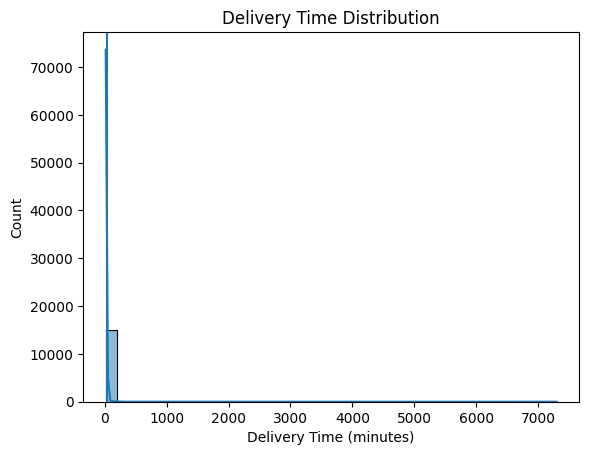

In [28]:
plt.figure()
sns.histplot(df["delivery_time_min"], bins=40, kde=True)
plt.axvline(31)
plt.title("Delivery Time Distribution")
plt.xlabel("Delivery Time (minutes)")
plt.show()

### Boxplot for Outlier Detection :

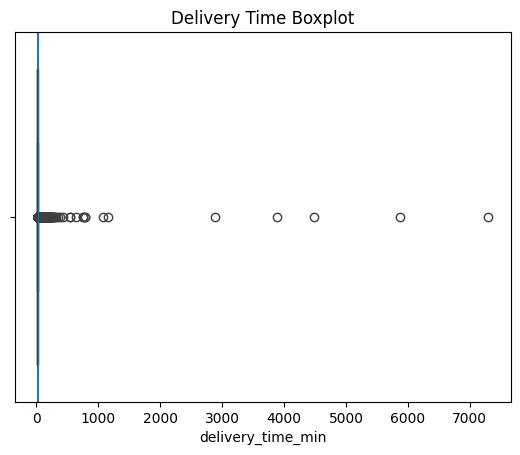

In [48]:
plt.figure()
sns.boxplot(x=df["delivery_time_min"])
plt.axvline(31)
plt.title("Delivery Time Boxplot")
plt.show()

### Time-Based Analysis :

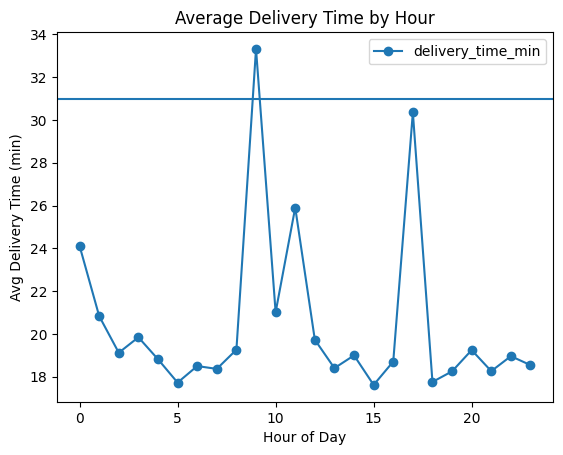

In [42]:
# Order by Hour

df["order_hour"] = df["order_placed_at"].dt.hour

hourly_stats = df.groupby("order_hour")["delivery_time_min"].mean()

plt.figure()
hourly_stats.plot(kind="line", marker="o")
plt.axhline(31)
plt.title("Average Delivery Time by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Avg Delivery Time (min)")
plt.legend()
plt.show()

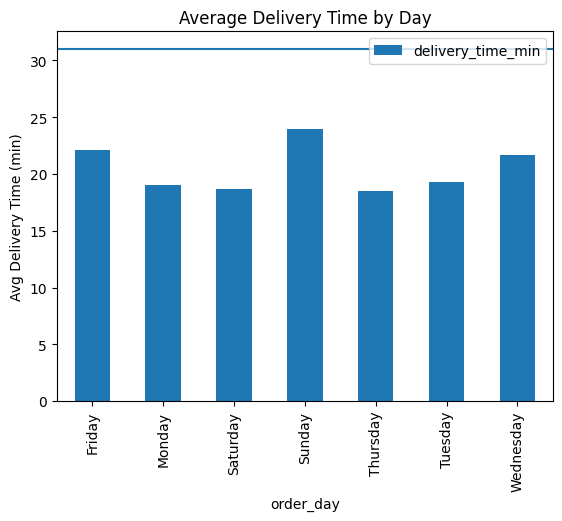

In [43]:
# Order by Day

df["order_day"] = df["order_placed_at"].dt.day_name()

day_stats = df.groupby("order_day")["delivery_time_min"].mean()

plt.figure()
day_stats.plot(kind="bar")
plt.axhline(31)
plt.title("Average Delivery Time by Day")
plt.ylabel("Avg Delivery Time (min)")
plt.legend()
plt.show()

### SLA Breach :

In [49]:
breached_orders = df[df["delivery_time_min"] > 31]

breached_orders.describe()

,order_id,order_placed_at,order_delivered_at,delivery_time_min,order_hour
count,5.570000e+02,557,557,557.000000,557.000000
mean,1.530704e+06,2023-03-14 15:01:12.055655168,2023-03-14 16:59:47.265613824,118.586833,11.592460
min,1.523114e+06,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,31.017259,0.000000
25%,1.526868e+06,2023-03-07 16:17:36,2023-03-07 18:09:13.719900928,35.049563,5.000000
50%,1.530885e+06,2023-03-14 22:39:10,2023-03-15 00:16:40.029102080,42.810701,12.000000
75%,1.534309e+06,2023-03-21 04:45:36,2023-03-21 06:55:04.555074048,68.072933,17.000000
max,1.538064e+06,2023-03-27 22:04:53,2023-03-29 02:42:50.645252,7299.831375,23.000000
std,4.242406e+03,NaN,NaN,489.153001,7.092463


In [50]:
breached_orders.shape

(557, 6)

### KPIs Summary :

In [51]:
kpi_summary = {
    "Total Orders": len(df),
    "Average Delivery Time": round(df["delivery_time_min"].mean(), 2),
    "Median Delivery Time": round(df["delivery_time_min"].median(), 2),
    "95th Percentile": round(p95, 2),
    "SLA Breach %": round(sla_breach_pct, 2)
}

kpi_summary

{'Total Orders': 15000,
 'Average Delivery Time': np.float64(20.5),
 'Median Delivery Time': np.float64(15.8),
 '95th Percentile': np.float64(27.26),
 'SLA Breach %': np.float64(3.71)}

In [52]:
if p95 < 31:
    print('SLA met')
else:
    print('SLA Breach')

SLA met
